# SIIM: Step-by-Step Image Detection for Beginners - Part 2. Modeling
...ing

Thanks for nice reference :

`load dataset(original image size info-)`
- [Resized to 256px JPG](https://www.kaggle.com/xhlulu/siim-covid19-resized-to-256px-jpg)

```
Step 1. Load Data and Trim for use
     1-a. load train-dataframe
     1-b. load meta-dataframe
     1-c. load image data array
     1-d. calculate image resize ratio information
     ....ing
```

## Step 1. Load Data and Trim for use

### 1-a. load train-dataframe

In [2]:
import pandas as pd

In [3]:
# train_df = pd.read_csv('/kaggle/input/siimcovid19-train-data-that-opacitycount-added/train_df.csv')
# local
train_df = pd.read_csv('./data/train_df.csv')

In [4]:
train_df.head()

,Unnamed: 0,id,boxes,label,StudyInstanceUID,OpacityCount,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance,Path
0,0,000a312787f2_image,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,2,0,1,0,0,/kaggle/input/siim-covid19-detection//train/57...
1,1,000c3a3f293f_image,NaN,none 1 0 0 1 1,ff0879eb20ed,0,1,0,0,0,/kaggle/input/siim-covid19-detection//train/ff...
2,2,0012ff7358bc_image,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7,2,0,1,0,0,/kaggle/input/siim-covid19-detection//train/9d...
3,3,001398f4ff4f_image,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2,1,0,0,0,1,/kaggle/input/siim-covid19-detection//train/28...
4,4,001bd15d1891_image,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e,2,0,1,0,0,/kaggle/input/siim-covid19-detection//train/df...


We don't use dcm file. drop 'path' column

In [5]:
train_df.drop(columns='Path', axis=1,inplace=True)

In [6]:
train_df.head()

,Unnamed: 0,id,boxes,label,StudyInstanceUID,OpacityCount,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance
0,0,000a312787f2_image,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,2,0,1,0,0
1,1,000c3a3f293f_image,NaN,none 1 0 0 1 1,ff0879eb20ed,0,1,0,0,0
2,2,0012ff7358bc_image,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7,2,0,1,0,0
3,3,001398f4ff4f_image,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2,1,0,0,0,1
4,4,001bd15d1891_image,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e,2,0,1,0,0


And add 'Opacity' Column. The Value is 1 If Opacity detected, else 0

In [7]:
train_df['Opacity'] = train_df.apply(lambda row : 1 if row.label.split(' ')[0]=='opacity' else 0, axis=1)
train_df

,Unnamed: 0,id,boxes,label,StudyInstanceUID,OpacityCount,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance,Opacity
0,0,000a312787f2_image,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,2,0,1,0,0,1
1,1,000c3a3f293f_image,NaN,none 1 0 0 1 1,ff0879eb20ed,0,1,0,0,0,0
2,2,0012ff7358bc_image,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7,2,0,1,0,0,1
3,3,001398f4ff4f_image,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2,1,0,0,0,1,1
4,4,001bd15d1891_image,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e,2,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
6329,6329,ffcc6edd9445_image,NaN,none 1 0 0 1 1,7e6c68462e06,0,1,0,0,0,0
6330,6330,ffd91a2c4ca0_image,NaN,none 1 0 0 1 1,8332bdaddb6e,0,1,0,0,0,0
6331,6331,ffd9b6cf2961_image,"[{'x': 2197.38566, 'y': 841.07361, 'width': 31...",opacity 1 2197.38566 841.07361 2513.80265 1292...,7eed9af03814,3,0,1,0,0,1
6332,6332,ffdc682f7680_image,"[{'x': 2729.27083, 'y': 332.26044, 'width': 14...",opacity 1 2729.27083 332.26044 4225.52099 2936...,a0cb0b96fb3d,2,0,1,0,0,1


In [8]:
train_df.drop(columns=['Unnamed: 0'], inplace=True)
train_df

,id,boxes,label,StudyInstanceUID,OpacityCount,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance,Opacity
0,000a312787f2_image,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,2,0,1,0,0,1
1,000c3a3f293f_image,NaN,none 1 0 0 1 1,ff0879eb20ed,0,1,0,0,0,0
2,0012ff7358bc_image,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7,2,0,1,0,0,1
3,001398f4ff4f_image,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2,1,0,0,0,1,1
4,001bd15d1891_image,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e,2,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
6329,ffcc6edd9445_image,NaN,none 1 0 0 1 1,7e6c68462e06,0,1,0,0,0,0
6330,ffd91a2c4ca0_image,NaN,none 1 0 0 1 1,8332bdaddb6e,0,1,0,0,0,0
6331,ffd9b6cf2961_image,"[{'x': 2197.38566, 'y': 841.07361, 'width': 31...",opacity 1 2197.38566 841.07361 2513.80265 1292...,7eed9af03814,3,0,1,0,0,1
6332,ffdc682f7680_image,"[{'x': 2729.27083, 'y': 332.26044, 'width': 14...",opacity 1 2729.27083 332.26044 4225.52099 2936...,a0cb0b96fb3d,2,0,1,0,0,1


### 1-b. load meta-dataframe

We need the size of the individual images. This is necessary later to calculate the ratio and find the coordinates of the box border to detect the opacity.

In [9]:
meta_df = pd.read_csv('./data/meta.csv')

In [10]:
meta_df.head()

,image_id,dim0,dim1,split
0,a29c5a68b07b,2320,2828,test
1,9850b5470fd6,2330,2382,test
2,8d6dea06a032,2422,3344,test
3,dfc5c09a50bc,1140,1387,test
4,7230234e120a,2318,2383,test


- Y(height) : `dim0` 
- X(width) : `dim1`


In [11]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7597 entries, 0 to 7596
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image_id  7597 non-null   object
 1   dim0      7597 non-null   int64 
 2   dim1      7597 non-null   int64 
 3   split     7597 non-null   object
dtypes: int64(2), object(2)
memory usage: 237.5+ KB


In [12]:
meta_df.split.unique()

array(['test', 'train'], dtype=object)

In [13]:
import warnings
warnings.filterwarnings(action='ignore')

In [14]:
train_meta_df = meta_df.loc[meta_df.split=='train']
train_meta_df.drop('split',axis=1,inplace=True)
train_meta_df.columns = ['id', 'origin_img_height','origin_img_width']
train_meta_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6334 entries, 1263 to 7596
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 6334 non-null   object
 1   origin_img_height  6334 non-null   int64 
 2   origin_img_width   6334 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 197.9+ KB


In [15]:
train_meta_df

,id,origin_img_height,origin_img_width
1263,d8ba599611e5,2336,2836
1264,29b23a11d1e4,3488,4256
1265,8174f49500a5,2330,2846
1266,d54f6204b044,2330,2846
1267,d51cadde8626,3488,4256
...,...,...,...
7592,729eca7b4c1c,2539,3050
7593,39d52f244db3,2320,2832
7594,d342f75ccb55,2320,2832
7595,0f0b5a304a47,2320,2832


In [16]:
train_df.head()

,id,boxes,label,StudyInstanceUID,OpacityCount,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance,Opacity
0,000a312787f2_image,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,2,0,1,0,0,1
1,000c3a3f293f_image,NaN,none 1 0 0 1 1,ff0879eb20ed,0,1,0,0,0,0
2,0012ff7358bc_image,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7,2,0,1,0,0,1
3,001398f4ff4f_image,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2,1,0,0,0,1,1
4,001bd15d1891_image,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e,2,0,1,0,0,1


In [17]:
# test lambda
train_df['id'].apply(lambda x : x.split('_')[0])


0       000a312787f2
1       000c3a3f293f
2       0012ff7358bc
3       001398f4ff4f
4       001bd15d1891
            ...     
6329    ffcc6edd9445
6330    ffd91a2c4ca0
6331    ffd9b6cf2961
6332    ffdc682f7680
6333    ffe942c8655f
Name: id, Length: 6334, dtype: object

In [18]:
train_df['id'] = train_df['id'].apply(lambda x : x.split('_')[0])

In [19]:
train_df.head()

,id,boxes,label,StudyInstanceUID,OpacityCount,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance,Opacity
0,000a312787f2,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,2,0,1,0,0,1
1,000c3a3f293f,NaN,none 1 0 0 1 1,ff0879eb20ed,0,1,0,0,0,0
2,0012ff7358bc,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7,2,0,1,0,0,1
3,001398f4ff4f,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2,1,0,0,0,1,1
4,001bd15d1891,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e,2,0,1,0,0,1


In [20]:
train_df = pd.merge(train_df, train_meta_df, on='id')

In [122]:
train_df.head()

,id,boxes,label,StudyInstanceUID,OpacityCount,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance,Opacity,origin_img_height,origin_img_width,height_ratio,width_ratio
0,000a312787f2,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,2,0,1,0,0,1,3488,4256,0.073108,0.059915
1,000c3a3f293f,NaN,none 1 0 0 1 1,ff0879eb20ed,0,1,0,0,0,0,2320,2832,0.109914,0.090042
2,0012ff7358bc,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7,2,0,1,0,0,1,2544,3056,0.100236,0.083442
3,001398f4ff4f,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2,1,0,0,0,1,1,3520,4280,0.072443,0.059579
4,001bd15d1891,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e,2,0,1,0,0,1,2800,3408,0.091071,0.074824


### 1-c. load image data array

In [28]:
path = './data/train/'
train_imgs_path = list(train_df['id'].apply(lambda x : path + x + '.jpg').values)
train_imgs_path[:10]

['./data/train/000a312787f2.jpg',
 './data/train/000c3a3f293f.jpg',
 './data/train/0012ff7358bc.jpg',
 './data/train/001398f4ff4f.jpg',
 './data/train/001bd15d1891.jpg',
 './data/train/0022227f5adf.jpg',
 './data/train/0023f02ae886.jpg',
 './data/train/002e9b2128d0.jpg',
 './data/train/00326161e51e.jpg',
 './data/train/0044e449aae1.jpg']

Test sample image

In [80]:
import matplotlib.pyplot as plt

In [81]:
img = plt.imread(train_imgs_path[0])

In [82]:
img.shape

(256, 256)

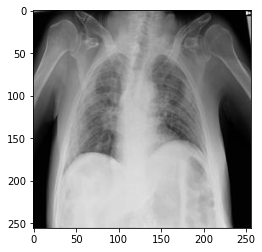

In [84]:
plt.imshow(img, cmap='gray');

In [33]:
import numpy as np

In [192]:
i = 0
train_imgs = []
for img_path in train_imgs_path:
    img = plt.imread(img_path)
    train_imgs.append(img)
    i += 1
    if i % 1000 == 0:
        print('{} / {}'.format(i, len(train_imgs_path)))
    elif i == 6334:
        print('6334 / 6334 (End)')

1000 / 6334
2000 / 6334
3000 / 6334
4000 / 6334
5000 / 6334
6000 / 6334
6334 / 6334 (End)


In [193]:
type(train_imgs)

list

In [194]:
train_imgs = np.array(train_imgs)

In [195]:
train_imgs.shape

(6334, 256, 256)

add Channel (3dim to 4dim, gray)

In [196]:
train_imgs_path[0]

'./data/train/000a312787f2.jpg'

In [197]:
train_imgs[:,:,:,np.newaxis].shape

(6334, 256, 256, 1)

In [198]:
train_imgs_4dim = train_imgs[:,:,:,np.newaxis]
train_imgs_4dim.shape

(6334, 256, 256, 1)

And simply EDA

In [107]:
len(train_imgs)

6334

In [108]:
min(train_imgs[0].reshape(-1)), max(train_imgs[0].reshape(-1))

(0, 255)

In [109]:
min(train_imgs[13].reshape(-1)), max(train_imgs[13].reshape(-1))

(0, 255)

### 1-d. calculate image resize ratio information

In [110]:
train_df['origin_img_height']

0       3488
1       2320
2       2544
3       3520
4       2800
        ... 
6329    4240
6330    2800
6331    2388
6332    3488
6333    1140
Name: origin_img_height, Length: 6334, dtype: int64

In [111]:
train_df['height_ratio'] = train_df['origin_img_height'].apply(lambda x : 255/x)
train_df['height_ratio']

0       0.073108
1       0.109914
2       0.100236
3       0.072443
4       0.091071
          ...   
6329    0.060142
6330    0.091071
6331    0.106784
6332    0.073108
6333    0.223684
Name: height_ratio, Length: 6334, dtype: float64

In [112]:
train_df['origin_img_width']

0       4256
1       2832
2       3056
3       4280
4       3408
        ... 
6329    3480
6330    3408
6331    3050
6332    4256
6333    1387
Name: origin_img_width, Length: 6334, dtype: int64

In [113]:
train_df['width_ratio'] = train_df['origin_img_width'].apply(lambda x : 255/x)
train_df['width_ratio']

0       0.059915
1       0.090042
2       0.083442
3       0.059579
4       0.074824
          ...   
6329    0.073276
6330    0.074824
6331    0.083607
6332    0.059915
6333    0.183850
Name: width_ratio, Length: 6334, dtype: float64

In [114]:
train_df

,id,boxes,label,StudyInstanceUID,OpacityCount,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance,Opacity,origin_img_height,origin_img_width,height_ratio,width_ratio
0,000a312787f2,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,2,0,1,0,0,1,3488,4256,0.073108,0.059915
1,000c3a3f293f,NaN,none 1 0 0 1 1,ff0879eb20ed,0,1,0,0,0,0,2320,2832,0.109914,0.090042
2,0012ff7358bc,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7,2,0,1,0,0,1,2544,3056,0.100236,0.083442
3,001398f4ff4f,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2,1,0,0,0,1,1,3520,4280,0.072443,0.059579
4,001bd15d1891,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e,2,0,1,0,0,1,2800,3408,0.091071,0.074824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6329,ffcc6edd9445,NaN,none 1 0 0 1 1,7e6c68462e06,0,1,0,0,0,0,4240,3480,0.060142,0.073276
6330,ffd91a2c4ca0,NaN,none 1 0 0 1 1,8332bdaddb6e,0,1,0,0,0,0,2800,3408,0.091071,0.074824
6331,ffd9b6cf2961,"[{'x': 2197.38566, 'y': 841.07361, 'width': 31...",opacity 1 2197.38566 841.07361 2513.80265 1292...,7eed9af03814,3,0,1,0,0,1,2388,3050,0.106784,0.083607
6332,ffdc682f7680,"[{'x': 2729.27083, 'y': 332.26044, 'width': 14...",opacity 1 2729.27083 332.26044 4225.52099 2936...,a0cb0b96fb3d,2,0,1,0,0,1,3488,4256,0.073108,0.059915


## Step 2. Image Pre-Classification with Data generator

### 2-a. classify image id by Opacity types

In [137]:
types = list(train_df.columns[5:9])
types

['Negative for Pneumonia',
 'Typical Appearance',
 'Indeterminate Appearance',
 'Atypical Appearance']

In [209]:
path

'./data/train/'

In [224]:
train_imgs.shape

(6334, 256, 256)

### 2-b. sort image files into each type's folder

Create folders for each class **in advance**, and save images in each folder.

In [228]:
# Negative for Pneumonia
imgs_Negative = list(train_df[train_df[types[0]]==1].index)
for idx in imgs_Negative:
    plt.imsave('./data/genData/Negative/{}.jpg'.format(train_df.loc[idx,'id']), train_imgs[idx], cmap='gray')

In [229]:
# Typical Apperance
imgs_Typical = list(train_df[train_df[types[1]]==1].index)
for idx in imgs_Typical:
    plt.imsave('./data/genData/Typical/{}.jpg'.format(train_df.loc[idx,'id']), train_imgs[idx], cmap='gray')

In [231]:
# Indeterminate Apearance
imgs_Indeterminate = list(train_df[train_df[types[2]]==1].index)
for idx in imgs_Indeterminate:
    plt.imsave('./data/genData/Indeterminate/{}.jpg'.format(train_df.loc[idx,'id']), train_imgs[idx], cmap='gray')

In [232]:
# Atypical Apearance
imgs_Atypical = list(train_df[train_df[types[3]]==1].index)
for idx in imgs_Atypical:
    plt.imsave('./data/genData/Atypical/{}.jpg'.format(train_df.loc[idx,'id']), train_imgs[idx], cmap='gray')

### 2-c. data generation, split train/valid set

In [270]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [121]:
idg = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=3,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.05,
    horizontal_flip=False,
    fill_mode='reflect',
    validation_split=0.2
)

In [262]:
data_path = './data/genData'
batch_size = 64
target_size = (256, 256)
class_mode = 'categorical'
color_mode = 'grayscale'

In [263]:
train_gen = idg.flow_from_directory(
    data_path,
    batch_size=batch_size,
    target_size=target_size,
    class_mode=class_mode,
    color_mode=color_mode,
    subset = 'training'
)

valid_gen = idg.flow_from_directory(
    data_path,
    batch_size = batch_size,
    target_size = target_size,
    class_mode = class_mode,
    color_mode=color_mode,
    subset = 'validation'
)

Found 5069 images belonging to 4 classes.
Found 1265 images belonging to 4 classes.


## Step 3. Modeling - Multiclass classifier

### 3-a. import libraries

In [269]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

### 3-b. basic modeling with keras api

In [265]:
model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(256, 256,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')
])
model.summary() 

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 254, 254, 64)      640       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 125, 125, 64)      36928     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 28, 28, 128)      

### 3-c. model compile

In [266]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

### 3-d. save model checkpoint

In [267]:
filepath = 'my_checkpoint.ckpt'
cp = ModelCheckpoint(
    filepath = filepath,
    save_weights_only = True,
    save_best_only = True,
    monitor = 'val_loss',
    verbose=1
)

### 3-e. # model fit (use gpu/kaggle)

In [ ]:
# epochs = 12
# model.fit(
#     train_gen,
#     validation_data = (valid_gen),
#     epochs = epochs,
#     callbacks=[cp]

### 3-f. load model(prpe-trained/gpu) & evaluate

In [272]:
import tensorflow as tf

In [274]:
mymodel = tf.keras.models.load_model('./model/basic_cnn.h5')

In [275]:
mymodel.evaluate(valid_gen)

20/20 [==============================] - 15s 689ms/step - loss: 1.1318 - acc: 0.5510


[1.1318233013153076, 0.5509881377220154]

In [276]:
mymodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 64)      640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       1